<a href="https://colab.research.google.com/github/prakrut12/Assist-tool/blob/main/credit_card_fraud_detection_using_QML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-machine-learning
!pip cache purge

Found existing installation: qiskit 1.0.2
Uninstalling qiskit-1.0.2:
  Successfully uninstalled qiskit-1.0.2
Found existing installation: qiskit-machine-learning 0.7.2
Uninstalling qiskit-machine-learning-0.7.2:
  Successfully uninstalled qiskit-machine-learning-0.7.2
Files removed: 60


In [2]:
!pip install qiskit qiskit-machine-learning pylatexenc --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.


In [5]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


Load and Preprocess Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("creditcard.csv")

# Check class imbalance
print(df["Class"].value_counts())

# Use small subset for quantum training (IMPORTANT)
df = df.sample(200, random_state=42)

# Separate features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions (Quantum circuits cannot handle 30 features)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)




Class
0    284315
1       492
Name: count, dtype: int64


In [15]:
import numpy as np

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

print("Training shape:", X_train.shape)

Training shape: (160, 2)


Build Quantum Circuit


In [16]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import StatevectorSampler

num_qubits = 2

feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2)
ansatz = RealAmplitudes(num_qubits, reps=2)

sampler = StatevectorSampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
)

/tmp/ipython-input-2836384672.py:7: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2)
/tmp/ipython-input-2836384672.py:8: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits, reps=2)


Train the Model

In [17]:
import time

start = time.time()

vqc.fit(X_train, y_train)

end = time.time()

print("Training Time:", end - start)

Training Time: 110.64218616485596


Evaluate Model

In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = vqc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.875
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.00      0.00      0.00         0

    accuracy                           0.88        40
   macro avg       0.50      0.44      0.47        40
weighted avg       1.00      0.88      0.93        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix

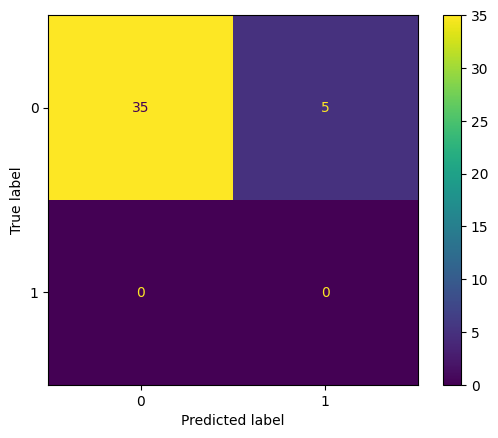

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()